In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [37]:
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

In [38]:
!conda install -c anaconda xlrd --yes

Solving environment: done

# All requested packages already installed.



In [39]:
# The code was removed by Watson Studio for sharing.

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.356511,47.517361,1,327920,329420,3856094,Matched,Intersection,34911.0,17TH AVE SW AND SW ROXBURY ST,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,-122.361405,47.702064,2,46200,46200,1791736,Matched,Block,NaN,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,...,Wet,Dusk,NaN,5101020.0,NaN,13,From same direction - both going straight - bo...,0,0,N
2,-122.317414,47.664028,3,1212,1212,3507861,Matched,Block,NaN,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,...,Dry,Dark - Street Lights On,NaN,NaN,NaN,30,From opposite direction - all others,0,0,N
3,-122.318234,47.619927,4,327909,329409,EA03026,Matched,Intersection,29054.0,11TH AVE E AND E JOHN ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,0,Vehicle going straight hits pedestrian,0,0,N
4,-122.351724,47.560306,5,104900,104900,2671936,Matched,Block,NaN,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,...,Ice,Dark - Street Lights On,NaN,9359012.0,Y,50,Fixed object,0,0,N


In [40]:
df_data_1.describe()

,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,214260.000000,214260.000000,221738.000000,221738.000000,221738.000000,72027.000000,221738.000000,221738.000000,221738.000000,221738.000000,221738.000000,221738.000000,221738.000000,221737.000000,1.272050e+05,221738.000000,2.217380e+05
mean,-122.330753,47.620191,110869.500000,145006.735517,145236.969811,37636.986713,2.226741,0.038095,0.027352,1.729442,0.373964,0.015203,0.001700,13.383305,7.971063e+06,262.624791,9.568044e+03
std,0.030058,0.056059,64010.391332,89372.351774,89749.554004,52000.820955,1.469699,0.201704,0.164512,0.830529,0.732050,0.158004,0.044967,7.298289,2.611523e+06,3252.882590,7.142784e+04
min,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,-122.349280,47.577106,55435.250000,71721.250000,71721.250000,28653.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,6.007029e+06,0.000000,0.000000e+00
50%,-122.330363,47.616033,110869.500000,127358.500000,127358.500000,29973.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,8.033011e+06,0.000000,0.000000e+00
75%,-122.311998,47.664290,166303.750000,210118.750000,210338.750000,33984.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,14.000000,1.018101e+07,0.000000,0.000000e+00
max,-122.238949,47.734142,221738.000000,334276.000000,335776.000000,764413.000000,93.000000,6.000000,2.000000,15.000000,78.000000,41.000000,5.000000,87.000000,1.307202e+07,525241.000000,5.239700e+06


In [41]:
df=df_data_1[['SEVERITYCODE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','ROADCOND','LIGHTCOND','WEATHER','INCDTTM']]
df.head(9)

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,ROADCOND,LIGHTCOND,WEATHER,INCDTTM
0,1,2,0,0,2,Dry,Daylight,Clear,1/19/2020 9:01:00 AM
1,1,2,0,0,2,Wet,Dusk,Raining,4/11/2005 6:31:00 PM
2,2,2,0,0,2,Dry,Dark - Street Lights On,Clear,3/31/2013 2:09:00 AM
3,2,3,1,0,1,Wet,Dark - Street Lights On,Raining,1/6/2020 5:55:00 PM
4,2,2,0,0,1,Ice,Dark - Street Lights On,Clear,12/25/2009 7:00:00 PM
5,1,2,0,0,2,Dry,Daylight,Clear,8/8/2019 12:49:00 PM
6,1,3,0,1,1,Dry,Daylight,Overcast,8/8/2019 8:57:00 AM
7,1,0,0,0,2,Dry,Daylight,Clear,8/27/2007
8,2b,3,0,0,3,Dry,Daylight,Clear,7/6/2005


In [42]:
df.dtypes

SEVERITYCODE    object
PERSONCOUNT      int64
PEDCOUNT         int64
PEDCYLCOUNT      int64
VEHCOUNT         int64
ROADCOND        object
LIGHTCOND       object
WEATHER         object
INCDTTM         object
dtype: object

In [43]:
#dropping empty rows
df1=df.dropna()
df1.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,ROADCOND,LIGHTCOND,WEATHER,INCDTTM
0,1,2,0,0,2,Dry,Daylight,Clear,1/19/2020 9:01:00 AM
1,1,2,0,0,2,Wet,Dusk,Raining,4/11/2005 6:31:00 PM
2,2,2,0,0,2,Dry,Dark - Street Lights On,Clear,3/31/2013 2:09:00 AM
3,2,3,1,0,1,Wet,Dark - Street Lights On,Raining,1/6/2020 5:55:00 PM
4,2,2,0,0,1,Ice,Dark - Street Lights On,Clear,12/25/2009 7:00:00 PM


In [104]:
# Select wanted columns
df1=df1[['SEVERITYCODE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','ROADCOND','LIGHTCOND','WEATHER']]
df1.head(9)

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,ROADCOND,LIGHTCOND,WEATHER
221737,2,3,0,0,2,1,0,1
149856,2b,1,0,0,1,1,1,2
96238,1,3,0,0,2,1,0,2
95902,1,4,0,0,2,1,1,1
96271,1,3,0,0,2,1,1,1
96244,1,4,0,0,2,1,1,1
149863,2,4,0,0,3,1,0,1
149862,1,2,0,0,2,1,1,1
149860,3,4,0,0,2,1,1,1


In [105]:
df1.shape

(194827, 8)

In [108]:
#define labels
y = df1['SEVERITYCODE']
X = df1.drop('SEVERITYCODE', axis=1)
df1.head()
#Normalize data
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


array([[ 0.39148692, -0.2017252 , -0.17751299,  0.06380249,  0.71936682,
        -0.59345014,  0.21146118],
       [-1.06488196, -0.2017252 , -0.17751299, -1.69489118,  0.71936682,
         0.34717784,  1.11534998],
       [ 0.39148692, -0.2017252 , -0.17751299,  0.06380249,  0.71936682,
        -0.59345014,  1.11534998],
       [ 1.11967137, -0.2017252 , -0.17751299,  0.06380249,  0.71936682,
         0.34717784,  0.21146118],
       [ 0.39148692, -0.2017252 , -0.17751299,  0.06380249,  0.71936682,
         0.34717784,  0.21146118]])

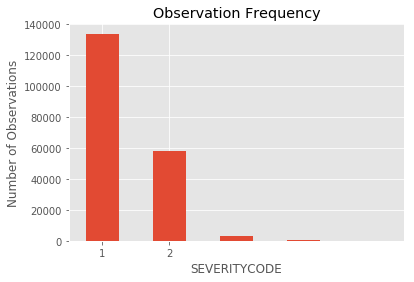

In [109]:
LABELS= ['1','2']
count_codes = pd.value_counts(df1['SEVERITYCODE'], sort = True)
count_codes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), LABELS)
plt.title("Observation Frequency")
plt.xlabel("SEVERITYCODE")
plt.ylabel("Number of Observations");

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


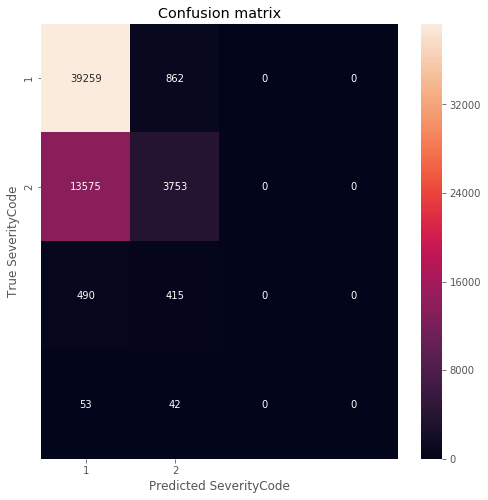

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.74      0.98      0.84     40121
           2       0.74      0.22      0.34     17328
          2b       0.00      0.00      0.00       905
           3       0.00      0.00      0.00        95

   micro avg       0.74      0.74      0.74     58449
   macro avg       0.37      0.30      0.29     58449
weighted avg       0.72      0.74      0.68     58449



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [116]:
#Testing basemodel with Logistic Regression

#Set test training
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
 
#function
def run_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base
 #executing basemodel
model = run_model(X_train, X_test, y_train, y_test)
 
#define work
def showresults(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True SeverityCode')
    plt.xlabel('Predicted SeverityCode')
    plt.show()
    print (classification_report(y_test, pred_y))
 
pred_y = model.predict(X_test)
showresults(y_test, pred_y)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


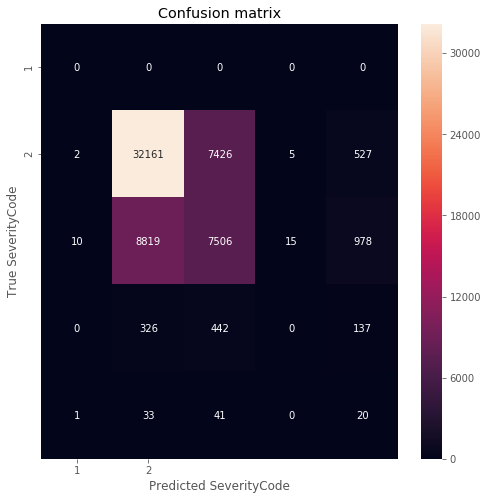

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.78      0.80      0.79     40121
           2       0.49      0.43      0.46     17328
          2b       0.00      0.00      0.00       905
           3       0.01      0.21      0.02        95

   micro avg       0.68      0.68      0.68     58449
   macro avg       0.26      0.29      0.25     58449
weighted avg       0.68      0.68      0.68     58449



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [117]:
#Improve recall=0.22 which is too slow

#Applied weight = “balanced” to our training model
def run_model_balanced(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
    clf.fit(X_train, y_train)
    return clf
 
model = run_model_balanced(X_train, X_test, y_train, y_test)
pred_y = model.predict(X_test)
showresults(y_test, pred_y)